In [69]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader


import numpy as np

import math

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

# 01-Tensors

In [ ]:
x = torch.rand([2, 3])
print(x)
print(x.size())

In [3]:
x = torch.rand(2, 2)
y = torch.rand(2, 2)
print(x)
print(y)

tensor([[0.3773, 0.7637],
        [0.4393, 0.5986]])
tensor([[0.7164, 0.0081],
        [0.5878, 0.5885]])


## Tensors - Operations

In [4]:
z = x + y
z

tensor([[1.0937, 0.7718],
        [1.0271, 1.1871]])

In [6]:
z = torch.add(x, y)
z

tensor([[1.0937, 0.7718],
        [1.0271, 1.1871]])

In [7]:
y.add_(x) # in place addition
y == z

tensor([[True, True],
        [True, True]])

In [8]:
z = torch.sub(x, y)
z

tensor([[-0.7164, -0.0081],
        [-0.5878, -0.5885]])

In [9]:
z = torch.mul(x, y)
z

tensor([[0.4126, 0.5894],
        [0.4512, 0.7106]])

## Tensors - Slicing

In [10]:
x = torch.rand(5, 3)
x

tensor([[0.8132, 0.6795, 0.6702],
        [0.5922, 0.7865, 0.8401],
        [0.8315, 0.7938, 0.0453],
        [0.5934, 0.9114, 0.6274],
        [0.6779, 0.1583, 0.6205]])

In [11]:
x[:, 0] # Only col 0, with all the rows

tensor([0.8132, 0.5922, 0.8315, 0.5934, 0.6779])

In [12]:
x[1, :] # Only row 1, with all cols

tensor([0.5922, 0.7865, 0.8401])

In [ ]:
x[1, 1].item() # Gives the actual value, not a tensor

tensor(0.7865)

## Tensors - Reshaping

In [15]:
x = torch.rand(4, 4)
x

tensor([[0.0369, 0.2352, 0.0439, 0.5040],
        [0.7394, 0.0749, 0.0093, 0.1163],
        [0.4623, 0.1997, 0.3245, 0.6642],
        [0.4750, 0.4993, 0.6056, 0.2409]])

In [ ]:
y = x.view(16)
y # Now it is a 1D vector

tensor([0.0369, 0.2352, 0.0439, 0.5040, 0.7394, 0.0749, 0.0093, 0.1163, 0.4623,
        0.1997, 0.3245, 0.6642, 0.4750, 0.4993, 0.6056, 0.2409])

In [17]:
y = x.view(-1, 8) # Torch does the rest
y

tensor([[0.0369, 0.2352, 0.0439, 0.5040, 0.7394, 0.0749, 0.0093, 0.1163],
        [0.4623, 0.1997, 0.3245, 0.6642, 0.4750, 0.4993, 0.6056, 0.2409]])

## Tensors - Converting from numpy to torch

In [23]:
a = torch.ones(5)
print(type(a))
a

<class 'torch.Tensor'>


tensor([1., 1., 1., 1., 1.])

In [ ]:
b = a.numpy()
print(type(b))
b

# Both element a and b point to the same memory location

<class 'numpy.ndarray'>


array([1., 1., 1., 1., 1.], dtype=float32)

In [25]:
a = np.ones(5)
print(type(a))
a

<class 'numpy.ndarray'>


array([1., 1., 1., 1., 1.])

In [26]:
b = torch.from_numpy(a)
print(type(b))
b

<class 'torch.Tensor'>


tensor([1., 1., 1., 1., 1.], dtype=torch.float64)

In [ ]:
# Need to calculate the gradient later for the optimization step
x = torch.ones(5, requires_grad=True)
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

# 02-Autograd

Gradients : essential for optimization

In [47]:
x = torch.randn(3, requires_grad=True)
x

tensor([-1.2167,  1.8743,  0.6096], requires_grad=True)

In [41]:
y = x + 2 # Create a computational graph, we add a bias
y

tensor([1.4651, 1.9357, 2.0257], grad_fn=<AddBackward0>)

In [42]:
z = y*y*2
z

tensor([4.2928, 7.4939, 8.2066], grad_fn=<MulBackward0>)

In [43]:
v = torch.tensor([0.1, 1.0, 0.001], dtype=torch.float32)
z.backward(v) # dz/dx
x.grad

tensor([0.5860, 7.7428, 0.0081])

Most of the time, we take the mean of z : z = z.mean()
So no need to pass an argument in the .backward()

In [48]:
# To stop torch from tracking the history of calcuating the grad_fn attribute : 
x.requires_grad_(False)
print(x) # Doesn't have the require_grad attribute anymore

y = x.detach()
print(y) # Create a new tensor that doesn't require the gradient

with torch.no_grad():
    y = x + 2
    print(y)

tensor([-1.2167,  1.8743,  0.6096])
tensor([-1.2167,  1.8743,  0.6096])
tensor([0.7833, 3.8743, 2.6096])


In [53]:
weights = torch.ones(4, requires_grad=True)

# Training loop
for epoch in range(3):
    model_ouput = (weights*3).sum()
    model_ouput.backward() # We have the gradient
    
    print(weights.grad)
    weights.grad.zero_()

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [ ]:
# This will be taken care of in next tutorials
weights = torch.ones(4, requires_grad=True)
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad()

# 03-Backpropagation

Not much here. Already worked on it quite a lot with 01_mlp_no_lib  
1 : forward pass  
2 : compute local gradients  
3 : backward pass  

In [56]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)
w = torch.tensor(1.0, requires_grad=True)

# Forward pass and compute the loss
y_hat = w * x
loss = (y_hat - y)**2
print(loss) 

# Backward pass
loss.backward()
print(w.grad)

# Update the weights
# Next forward and backward pass etc...

tensor(1., grad_fn=<PowBackward0>)
tensor(-2.)


# 04-Gradient descent using autograd

## Step 1 : 
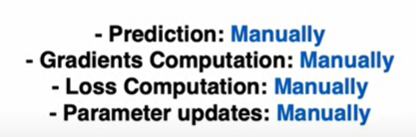

In [60]:
# Linear regression from scratch
# f = w*x, where w = 2

X = np.array([1, 2, 3, 4], dtype=np.float32)
y = np.array([2, 4, 6, 8], dtype=np.float32)

w = 0.0

# Model pred
def forward(x):
    return w*x

# Loss
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

# Gradient
# MSE = 1/N (w*x - y)**2
# dLoss/dw = 1/N 2x (w*x - y)
def gradient(x, y, y_hat):
    return np.dot(2*x, y_hat - y).mean()

print(f"Prediction before training : f(5) = {forward(5):.3f}")

# Training
lr = 0.01
n_epochs = 20

for epoch in range(n_epochs):
    # Prediction - forward pass
    y_hat = forward(X)
    
    # Loss
    l = loss(y, y_hat)
    
    # Gradient
    dw = gradient(X, y, y_hat)
    
    # Update the weights
    w -= lr*dw
    
    if epoch % 1 == 0:
        print(f"Epoch n°{epoch + 1}, Weight w = {w:.3f}, Loss = {l:.3f}")
        

print(f"Prediction after training : f(5) = {forward(5):.3f}")
    

Prediction before training : f(5) = 0.000
Epoch n°1, Weight w = 1.200, Loss = 30.000
Epoch n°2, Weight w = 1.680, Loss = 4.800
Epoch n°3, Weight w = 1.872, Loss = 0.768
Epoch n°4, Weight w = 1.949, Loss = 0.123
Epoch n°5, Weight w = 1.980, Loss = 0.020
Epoch n°6, Weight w = 1.992, Loss = 0.003
Epoch n°7, Weight w = 1.997, Loss = 0.001
Epoch n°8, Weight w = 1.999, Loss = 0.000
Epoch n°9, Weight w = 1.999, Loss = 0.000
Epoch n°10, Weight w = 2.000, Loss = 0.000
Epoch n°11, Weight w = 2.000, Loss = 0.000
Epoch n°12, Weight w = 2.000, Loss = 0.000
Epoch n°13, Weight w = 2.000, Loss = 0.000
Epoch n°14, Weight w = 2.000, Loss = 0.000
Epoch n°15, Weight w = 2.000, Loss = 0.000
Epoch n°16, Weight w = 2.000, Loss = 0.000
Epoch n°17, Weight w = 2.000, Loss = 0.000
Epoch n°18, Weight w = 2.000, Loss = 0.000
Epoch n°19, Weight w = 2.000, Loss = 0.000
Epoch n°20, Weight w = 2.000, Loss = 0.000
Prediction after training : f(5) = 10.000


## Step 2 : 
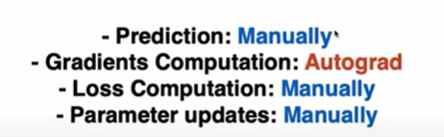

In [63]:
# Computing the gradients with torch
# f = w*x, where w = 2

X = torch.tensor([1, 2, 3, 4], dtype=torch.float32)
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# Model pred
def forward(x):
    return w*x

# Loss
def loss(y, y_hat):
    return ((y_hat - y)**2).mean()

# Gradient
# We are now computing the gradients with torch

print(f"Prediction before training : f(5) = {forward(5):.3f}")

# Training
lr = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # Prediction - forward pass
    y_hat = forward(X)
    
    # Loss
    l = loss(y, y_hat)
    
    # Gradient = backward() now
    l.backward() # Calculate the gradient to the loss /dw
    
    # Update the weights -> should keep track of the gradient, so we use no grad here
    with torch.no_grad():
        w -= lr*w.grad
    
    # We must empty the gradient to avoid accumulation
    w.grad.zero_()
    
    if epoch % 10 == 0:
        print(f"Epoch n°{epoch + 1}, Weight w = {w:.3f}, Loss = {l:.3f}")
        

print(f"Prediction after training : f(5) = {forward(5):.3f}")
    

Prediction before training : f(5) = 0.000
Epoch n°1, Weight w = 0.300, Loss = 30.000
Epoch n°11, Weight w = 1.665, Loss = 1.163
Epoch n°21, Weight w = 1.934, Loss = 0.045
Epoch n°31, Weight w = 1.987, Loss = 0.002
Epoch n°41, Weight w = 1.997, Loss = 0.000
Epoch n°51, Weight w = 1.999, Loss = 0.000
Epoch n°61, Weight w = 2.000, Loss = 0.000
Epoch n°71, Weight w = 2.000, Loss = 0.000
Epoch n°81, Weight w = 2.000, Loss = 0.000
Epoch n°91, Weight w = 2.000, Loss = 0.000
Prediction after training : f(5) = 10.000


# 05-Training pipeline

## Step 3 : 
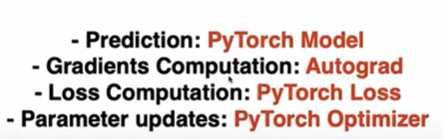

In [20]:
# Computing the loss and parameters update with torch, and making the predictions with torch
# 1 : Design model (input, output, forward pass)
# 2 : Construct the loss and optimizer
# 3 : Training loop -> foward pass (compute the pred), backward pass (get the gradients), update the weights



X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# We don't need the weights anymore as the model knows the parameters
# To use Linear, we need to modify X and y

X_test = torch.tensor([5], dtype=torch.float32) # To use in our prediction

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

# Model pred
# We now use a torch model

# Loss
# We will use pytorch to compute it now

# Gradient
# We are now computing the gradients with torch

print(f"Prediction before training : f(5) = {model(X_test).item():.3f}")

# Training
lr = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Prediction - forward pass
    y_hat = model(X)
    
    # Loss
    l = loss(y, y_hat) # Stays the same here
    
    # Gradient = backward() now
    l.backward() # Calculate the gradient to the loss /dw
    
    # Update the weights -> should keep track of the gradient, so we use no grad here
    optimizer.step() # Replace the manual weight optimization
    
    # We must empty the gradient to avoid accumulation
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"Epoch n°{epoch + 1}, Weight w = {w[0][0].item():.3f}, Loss = {l:.3f}")
        

print(f"Prediction after training : f(5) = {model(X_test).item():.3f}")
    

4 1
Prediction before training : f(5) = -3.576
Epoch n°1, Weight w = -0.089, Loss = 60.986
Epoch n°11, Weight w = 1.698, Loss = 1.580
Epoch n°21, Weight w = 1.984, Loss = 0.043
Epoch n°31, Weight w = 2.030, Loss = 0.003
Epoch n°41, Weight w = 2.036, Loss = 0.002
Epoch n°51, Weight w = 2.036, Loss = 0.002
Epoch n°61, Weight w = 2.035, Loss = 0.002
Epoch n°71, Weight w = 2.034, Loss = 0.002
Epoch n°81, Weight w = 2.033, Loss = 0.002
Epoch n°91, Weight w = 2.032, Loss = 0.001
Prediction after training : f(5) = 10.064


In [21]:
# We can write a custom Linear Regression model : 

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        self.lin = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        return self.lin(x)

model = LinearRegression(input_size, output_size)

X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

# We don't need the weights anymore as the model knows the parameters
# To use Linear, we need to modify X and y

X_test = torch.tensor([5], dtype=torch.float32) # To use in our prediction

n_samples, n_features = X.shape
print(n_samples, n_features)

input_size = n_features
output_size = n_features

#model = nn.Linear(input_size, output_size)

# Model pred
# We now use a torch model

# Loss
# We will use pytorch to compute it now

# Gradient
# We are now computing the gradients with torch

print(f"Prediction before training : f(5) = {model(X_test).item():.3f}")

# Training
lr = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Prediction - forward pass
    y_hat = model(X)
    
    # Loss
    l = loss(y, y_hat) # Stays the same here
    
    # Gradient = backward() now
    l.backward() # Calculate the gradient to the loss /dw
    
    # Update the weights -> should keep track of the gradient, so we use no grad here
    optimizer.step() # Replace the manual weight optimization
    
    # We must empty the gradient to avoid accumulation
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"Epoch n°{epoch + 1}, Weight w = {w[0][0].item():.3f}, Loss = {l:.3f}")
        

print(f"Prediction after training : f(5) = {model(X_test).item():.3f}")
    

4 1
Prediction before training : f(5) = -1.671
Epoch n°1, Weight w = -0.023, Loss = 40.035
Epoch n°11, Weight w = 1.432, Loss = 1.155
Epoch n°21, Weight w = 1.673, Loss = 0.142
Epoch n°31, Weight w = 1.719, Loss = 0.109
Epoch n°41, Weight w = 1.733, Loss = 0.102
Epoch n°51, Weight w = 1.742, Loss = 0.096
Epoch n°61, Weight w = 1.750, Loss = 0.091
Epoch n°71, Weight w = 1.757, Loss = 0.086
Epoch n°81, Weight w = 1.764, Loss = 0.081
Epoch n°91, Weight w = 1.771, Loss = 0.076
Prediction after training : f(5) = 9.542


# 06-Linear Regression

Epoch n°1, Loss = 993.372
Epoch n°11, Loss = 784.280
Epoch n°21, Loss = 636.907
Epoch n°31, Loss = 532.989
Epoch n°41, Loss = 459.683
Epoch n°51, Loss = 407.950
Epoch n°61, Loss = 371.428
Epoch n°71, Loss = 345.635
Epoch n°81, Loss = 327.414
Epoch n°91, Loss = 314.537


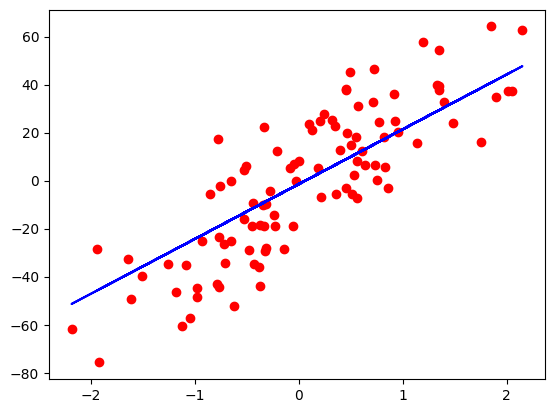

In [25]:
# 0 : Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=13)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) # Reshape the tensor

n_samples, n_features = X.shape 

 
# 1 : Design the model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 2 : Define the loss and optimizer
lr = 0.01
n_epochs = 100
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

# 3 : Training loop
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X)
    
    # Loss
    loss = criterion(y, y_pred) 
    
    # Backward pass
    loss.backward() 
    
    # Update the weights 
    optimizer.step() 
    
    # Empty the gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"Epoch n°{epoch + 1}, Loss = {loss:.3f}")
        

# Plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()

        

# 07-Logistic Regression

In [30]:
# 0 : Prepare the data
df = datasets.load_breast_cancer()
X, y = df.data, df.target
n_samples, n_features = X.shape
print(n_samples, n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32)) # Switch from double to float 32
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1) # Column vector
y_test = y_test.view(y_test.shape[0], 1)

# 1 : Design the model
# We apply a sigmoid function at the end
class LogisticRegression(nn.Module):
    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)
        
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = LogisticRegression(n_features)

# 2 : Define the loss and optimizer
learning_rate = 0.01
n_epochs = 100
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
# 3 : Training loop
for epoch in range(n_epochs):
    # Forward pass
    y_pred = model(X_train)
    
    # Loss
    loss = criterion(y_pred, y_train) 
    
    # Backward pass
    loss.backward() 
    
    # Update the weights 
    optimizer.step() 
    
    # Empty the gradients
    optimizer.zero_grad()
    
    if epoch % 10 == 0:
        [w, b] = model.parameters()
        print(f"Epoch n°{epoch + 1}, Loss = {loss.item():.3f}")

with torch.no_grad(): # Don't want to compute the gradient for the validation part
    y_pred = model(X_test)
    y_pred_class = y_pred.round()
    accuracy = y_pred_class.eq(y_test).sum() / float(y_test.shape[0])
    print(f"Accuracy : {accuracy:.3f}")
    


569 30
Epoch n°1, Loss = 0.551
Epoch n°11, Loss = 0.463
Epoch n°21, Loss = 0.405
Epoch n°31, Loss = 0.365
Epoch n°41, Loss = 0.335
Epoch n°51, Loss = 0.311
Epoch n°61, Loss = 0.292
Epoch n°71, Loss = 0.277
Epoch n°81, Loss = 0.263
Epoch n°91, Loss = 0.252
Accuracy : 0.921


# 08-Dataset et dataloaders

epoch = 1 foward and 1 backward pass of ALL training samples
batch_size = numbre of training samples in one foward and backward pass
numbre of iterations = numbre of passes, each pass using 1 batch_size number of samples

100 samples, batch_size = 20 -> 100/20 = 5 iterations for 1 epoch

In [42]:
class WineDataset(Dataset):
    def __init__(self):
        # Data loading
        xy = np.loadtxt("wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = torch.from_numpy(xy[:, 1:])
        self.y = torch.from_numpy(xy[:, [0]])
        self.n_samples = xy.shape[0]
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.n_samples
    
    
dataset = WineDataset()
# first_data = dataset[0]
# features, labels = first_data
# print(features)
# print(labels)
dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True)

# dataiter = iter(dataloader)
# data = next(dataiter) #dataiter.next()
# features, labels = data
# print(features)
# print(labels)

# Training loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)

for epoch in range(num_epochs):
    for i, (inputs, lables) in enumerate(dataloader):
        # Forward pass
        # Backward pass
        # Update
        if (i+1) % 5 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, setp {i+1}/{n_iterations}, inputs {inputs.shape}")

Epoch 1/2, setp 5/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 10/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 15/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 20/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 25/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 30/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 35/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 40/45, inputs torch.Size([4, 13])
Epoch 1/2, setp 45/45, inputs torch.Size([2, 13])
Epoch 2/2, setp 5/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 10/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 15/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 20/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 25/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 30/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 35/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 40/45, inputs torch.Size([4, 13])
Epoch 2/2, setp 45/45, inputs torch.Size([2, 13])


TODO : Check the coco dataset from pytorch, apparentyl we can use it ! (CV day 4)

# 09-Dataset Transforms

In [57]:
class WineDataset(Dataset):
    def __init__(self, transform=None):
        # Data loading
        xy = np.loadtxt("wine.csv", delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:, 1:]
        self.y = xy[:, [0]]
        self.n_samples = xy.shape[0]
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
            
        return sample
    
    def __len__(self):
        return self.n_samples
    
class ToTensor:
    def __call__(self, sample):
        inputs, labels = sample
        return torch.from_numpy(inputs), torch.from_numpy(labels)

class MulTransform:
    def __init__(self, factor):
        self.factor = factor
        
    def __call__(self, sample):
        inputs, labels = sample
        inputs *= self.factor
        return inputs, labels    
    
    
dataset = WineDataset(transform=ToTensor())
first_data = dataset[0]
features, labels = first_data
print(type(features))
print(type(labels))
print(features)
print("------------")
composed = torchvision.transforms.Compose([ToTensor(), MulTransform(1000000)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features, labels = first_data
print(type(features))
print(type(labels))
print(features)

<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([1.4230e+01, 1.7100e+00, 2.4300e+00, 1.5600e+01, 1.2700e+02, 2.8000e+00,
        3.0600e+00, 2.8000e-01, 2.2900e+00, 5.6400e+00, 1.0400e+00, 3.9200e+00,
        1.0650e+03])
------------
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor([1.4230e+07, 1.7100e+06, 2.4300e+06, 1.5600e+07, 1.2700e+08, 2.8000e+06,
        3.0600e+06, 2.8000e+05, 2.2900e+06, 5.6400e+06, 1.0400e+06, 3.9200e+06,
        1.0650e+09])


# 10-Softmax and Cross entropy

In [ ]:
# Numpy
def softmax(x):
    return np.exp(x)/np.sum(np.exp(x), axis=0)

x = np.array([2.0, 1.0, 0.1])
outputs = softmax(x)
print(f"Softmax : {outputs}")

# Pytorch
x = torch.tensor([2.0, 1.0, 0.1])
outputs = torch.softmax(x, dim=0) # Dim = 0 -> computes on the x axis
print(f"Softmax : {outputs}")

Softmax : [0.65900114 0.24243297 0.09856589]
Softmax : tensor([0.6590, 0.2424, 0.0986])


Cross entropy : the lower, the better
The y_real must be one hot encoded
The y_pred is probabilities

In [66]:
# Numpy
def cross_entropy(actual, predicted):
    loss = -np.sum(actual* np.log(predicted))
    return loss
Y = np.array([1, 0, 0])

Y_pred_good = np.array([0.7, 0.2, 0.1])
Y_pred_bad = np.array([0.1, 0.6, 0.3])

l1 = cross_entropy(Y, Y_pred_good)
l2 = cross_entropy(Y, Y_pred_bad)

print(f"Loss for good predicitions : {l1:.3f}")
print(f"Loss for bad predicitions : {l2:.3f}")

# Pytorch
loss = nn.CrossEntropyLoss() # Can't implement softmax for ourselves, as CrossEntropyLoss already applies LogSoftmax with neg Log Likelihood Loss

# Let's add 2 samples : we have now 3 samples
Y = torch.tensor([2, 0, 1]) # Class 0, not OHE anymore

# n_samples x n_classes = 1x3
# Now it is 3x3
Y_pred_good = torch.tensor([[0.1, 1.0, 2.1], [2.0, 1.0, 0.1], [0.1, 3.0, 0.1]]) # Raw values, no softmax
Y_pred_bad = torch.tensor([[2.1, 1.0, 0.1], [0.2, 1.0, 2.1], [0.1, 3.0, 0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(f"Loss for good predicitions : {l1.item()}")
print(f"Loss for bad predicitions : {l2.item()}")

# Get the actual prediction
_, predictions1 = torch.max(Y_pred_good, 1)
_, predictions2 = torch.max(Y_pred_bad, 1)

print(f"Good pred : {predictions1}")
print(f"Bad pred : {predictions2}")

Loss for good predicitions : 0.357
Loss for bad predicitions : 2.303
Loss for good predicitions : 0.3018244206905365
Loss for bad predicitions : 1.5940440893173218
Good pred : tensor([2, 0, 1])
Bad pred : tensor([0, 2, 1])


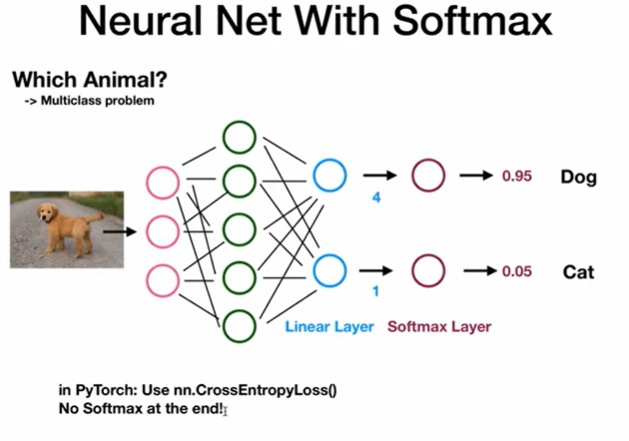

In [ ]:
# Multiclass problem

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        return out
    
model = NeuralNetwork(input_size=28*28, hidden_size=5, num_classes=2)
criterion = nn.CrossEntropyLoss() # Applies the softmax here

Can rephrase the problem : 

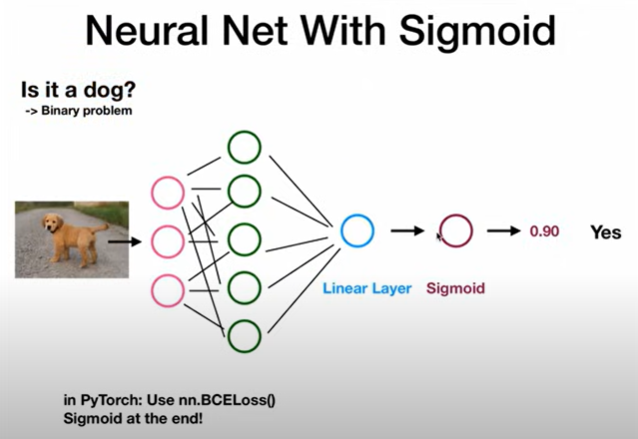

In [67]:
# Binary classification problem

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        y_pred = torch.sigmoid(out)
        return y_pred
    
model = NeuralNetwork(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() 

# 11-Activation Functions

If no functions, our model is essentially a Linear Regression model, not suited for complex tasks.
Most popular : 
- Step function (not used in practise)
- Sigmoid / Softmax
- TanH
- ReLU / Leaky ReLU (solve the vanishing gradient problem)

In [ ]:
# Exemple 1
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        out = self.sigmoid(out)
        return out
    
    
# Exemple 2 : only define the linear layers
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(NeuralNetwork, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        out = torch.relu(self.linear1(x))
        out = torch.sigmoid(self.linear2(out))
        return out

What is the difference between torch.sigmoid and nn.Sigmoid and torch.nn.functional.sigmoid ???
-> API differences

# 12-Feed forward neural net

In [ ]:
# MNIST
# Dataloader, transformation
# Multilayer neural network, activation functions
# Loss and Optimizer
# Training loop (batch training)
# Model evaluation

# Device config : none as I don't have a NVIDIA GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters definition
input_size = 784 #28x28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST
train_dataset = torchvision.datasets.MNIST(root="./data", 
                                           train=True, 
                                           transform=transforms.ToTensor(), 
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root="./data", 
                                           train=False, 
                                           transform=transforms.ToTensor())

# Dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=False)

example = iter(train_loader)
sample, label = next(example)
print(sample.shape)
print(label.shape)

# for i in range(6):
#     plt.subplot(2, 3, i+1)
#     plt.imshow(sample[i][0], cmap="gray")
    
# plt.show()

# Neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu(out)
        out = self.linear2(out)
        
        return out # We apply the softmax with the CEL
    
model = NeuralNet(input_size, hidden_size, num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss() # We apply softmax here
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, targets) in enumerate(train_loader):
        # We need to reshape the image 
        images = images.reshape(-1, 28*28).to(device)
        targets = targets.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, targets)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"Epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.3f}")
        
        
# Testing / validation
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    
    for images, targets in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        targets = targets.to(device)
        outputs = model(images)
        
        # Value and index 
        _, predictions = torch.max(outputs, 1)
        n_samples += targets.shape[0]
        
        n_correct += (predictions == targets).sum()
    
    print(n_samples)   
    accuracy = 100*n_correct / n_samples
    print(f"Accuracy = {accuracy:.3f}")

torch.Size([100, 1, 28, 28])
torch.Size([100])
Epoch 1 / 2, step 100 / 600, loss = 0.473
Epoch 1 / 2, step 200 / 600, loss = 0.518
Epoch 1 / 2, step 300 / 600, loss = 0.410
Epoch 1 / 2, step 400 / 600, loss = 0.256
Epoch 1 / 2, step 500 / 600, loss = 0.384
Epoch 1 / 2, step 600 / 600, loss = 0.356
Epoch 2 / 2, step 100 / 600, loss = 0.091
Epoch 2 / 2, step 200 / 600, loss = 0.232
Epoch 2 / 2, step 300 / 600, loss = 0.121
Epoch 2 / 2, step 400 / 600, loss = 0.187
Epoch 2 / 2, step 500 / 600, loss = 0.314
Epoch 2 / 2, step 600 / 600, loss = 0.225
10000
Accuracy = 94.990
